<a href="https://colab.research.google.com/github/densivanov/data_analytics_projects/blob/main/uber_analysis/uber_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [32]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

#Getting data

In [33]:
df = pd.read_parquet("/content/yellow_tripdata_2023-01.parquet")

In [34]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [35]:
loc = pd.read_csv("/content/taxi+_zone_lookup.csv")

In [36]:
loc.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


# Getting prepared

In [37]:
#creating a dictionary for values in the column
df['payment_type'] = df['payment_type'].map({
    1:"Credit card",
    2:"Cash",
    3:"No charge",
    4:"Dispute",
    5:"Unknown",
    6:"Voided trip"})

**Removing unnecessary columns**

In [38]:
df.drop(['VendorID',
         'trip_distance',  
         'RatecodeID',
         'store_and_fwd_flag'], axis = 1, inplace = True)

In [39]:
df.shape

(3066766, 15)

In [40]:
def summary(df):
  print(f'data shape: {df.shape}')
  summ = pd.DataFrame(df.dtypes, columns=['data type'])
  summ['#missing'] = df.isnull().sum().values
  summ['%missing'] = df.isnull().sum().values / len(df)
  summ['#unique'] = df.nunique().values
  summ['#duplicates'] = df.duplicated().count()
  desc = pd.DataFrame(df.describe(include='all').transpose())
  summ['min'] = desc['min'].values
  summ['max'] = desc['max'].values
  summ['first value'] = df.loc[0].values
  summ['second value'] = df.loc[1].values
  summ['third value'] = df.loc[2].values

  return summ

In [41]:
summary(df)

data shape: (3066766, 15)


<ipython-input-40-80ac669740cb>:8: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  desc = pd.DataFrame(df.describe(include='all').transpose())
<ipython-input-40-80ac669740cb>:8: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  desc = pd.DataFrame(df.describe(include='all').transpose())


,data type,#missing,%missing,#unique,#duplicates,min,max,first value,second value,third value
tpep_pickup_datetime,datetime64[ns],0,0.000000,1610975,3066766,NaN,NaN,2023-01-01 00:32:10,2023-01-01 00:55:08,2023-01-01 00:25:04
tpep_dropoff_datetime,datetime64[ns],0,0.000000,1611319,3066766,NaN,NaN,2023-01-01 00:40:36,2023-01-01 01:01:27,2023-01-01 00:37:49
passenger_count,float64,71743,0.023394,10,3066766,0.0,9.0,1.0,1.0,1.0
PULocationID,int64,0,0.000000,257,3066766,1.0,265.0,161,43,48
DOLocationID,int64,0,0.000000,261,3066766,1.0,265.0,141,237,238
payment_type,object,71743,0.023394,4,3066766,NaN,NaN,Cash,Credit card,Credit card
fare_amount,float64,0,0.000000,6873,3066766,-900.0,1160.1,9.3,7.9,14.9
extra,float64,0,0.000000,68,3066766,-7.5,12.5,1.0,1.0,1.0
mta_tax,float64,0,0.000000,10,3066766,-0.5,53.16,0.5,0.5,0.5
tip_amount,float64,0,0.000000,4036,3066766,-96.22,380.8,0.0,4.0,15.0


#### Cleaning data

In [42]:
df = df.dropna()

In [43]:
df.shape

(2995023, 15)

In [44]:
df.isna().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64

We have removed all the missing data and now have a completely clean dataset

Let's save the dataset

In [45]:
df.to_parquet('myfile.parquet')

#EDA

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2995023 entries, 0 to 2995022
Data columns (total 15 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tpep_pickup_datetime   datetime64[ns]
 1   tpep_dropoff_datetime  datetime64[ns]
 2   passenger_count        float64       
 3   PULocationID           int64         
 4   DOLocationID           int64         
 5   payment_type           object        
 6   fare_amount            float64       
 7   extra                  float64       
 8   mta_tax                float64       
 9   tip_amount             float64       
 10  tolls_amount           float64       
 11  improvement_surcharge  float64       
 12  total_amount           float64       
 13  congestion_surcharge   float64       
 14  airport_fee            float64       
dtypes: datetime64[ns](2), float64(10), int64(2), object(1)
memory usage: 365.6+ MB


In [47]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
passenger_count,2995023.0,1.362532,0.896120,0.00,1.0,1.00,1.00,9.00
PULocationID,2995023.0,166.439931,64.067847,1.00,132.0,162.00,234.00,265.00
DOLocationID,2995023.0,164.465083,69.927204,1.00,114.0,162.00,234.00,265.00
fare_amount,2995023.0,18.308272,17.893249,-900.00,8.6,12.80,19.80,1160.10
extra,2995023.0,1.569120,1.795131,-7.50,0.0,1.00,2.50,12.50
mta_tax,2995023.0,0.488026,0.104639,-0.50,0.5,0.50,0.50,53.16
tip_amount,2995023.0,3.359193,3.840552,-96.22,1.0,2.72,4.14,380.80
tolls_amount,2995023.0,0.520226,2.021865,-65.00,0.0,0.00,0.00,196.99
improvement_surcharge,2995023.0,0.981724,0.185387,-1.00,1.0,1.00,1.00,1.00
total_amount,2995023.0,26.969763,22.269083,-751.00,15.4,20.02,28.56,1169.40


In [48]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,161,141,Cash,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,43,237,Credit card,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,48,238,Credit card,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,138,7,Credit card,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,107,79,Credit card,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


Now, I am going to merge 'df' and 'loc' datasets

In [49]:
new_df = df.merge(loc, how = 'left', left_on = 'PULocationID', right_on ='LocationID' ).copy()

In [50]:
new_df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,LocationID,Borough,Zone,service_zone
0,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,161,141,Cash,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,161,Manhattan,Midtown Center,Yellow Zone
1,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,43,237,Credit card,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,43,Manhattan,Central Park,Yellow Zone
2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,48,238,Credit card,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,48,Manhattan,Clinton East,Yellow Zone
3,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,138,7,Credit card,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,138,Queens,LaGuardia Airport,Airports
4,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,107,79,Credit card,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,107,Manhattan,Gramercy,Yellow Zone


In [51]:
new_df.drop(['Borough','LocationID','service_zone','PULocationID'], axis = 1,inplace = True)

In [57]:
new_df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Pull_Zone
0,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,141,Cash,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,Midtown Center
1,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,237,Credit card,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,Central Park
2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,238,Credit card,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,Clinton East
3,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,7,Credit card,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,LaGuardia Airport
4,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,79,Credit card,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,Gramercy


In [56]:
new_df.rename(columns = {'Zone':'Pull_Zone'},inplace = True)

**Let's save the dataset**

In [58]:
new_df.to_parquet('new_df.parquet')

#### Passengers and time

In [59]:
data = new_df.groupby(by = 'tpep_pickup_datetime',as_index = False)['passenger_count'].sum()
data

,tpep_pickup_datetime,passenger_count
0,2008-12-31 23:01:42,1.0
1,2008-12-31 23:04:41,1.0
2,2022-10-24 17:37:47,1.0
3,2022-10-24 20:01:46,1.0
4,2022-10-24 21:45:35,1.0
...,...,...
1592214,2023-02-01 00:00:40,5.0
1592215,2023-02-01 00:00:55,1.0
1592216,2023-02-01 00:01:10,1.0
1592217,2023-02-01 00:13:10,1.0


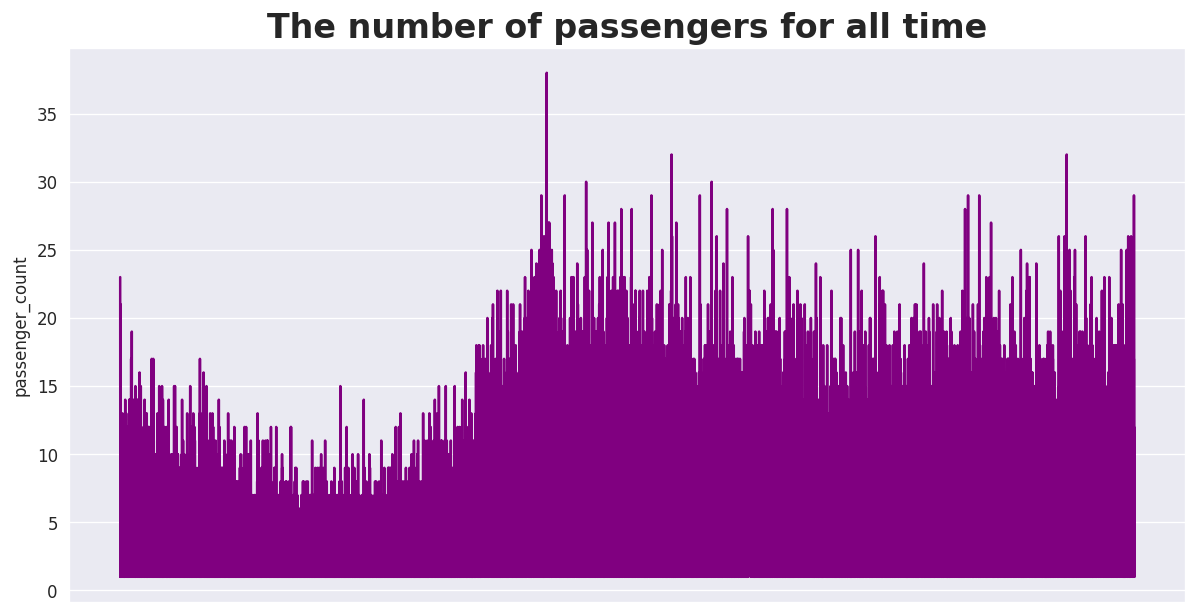

In [ ]:
plt.figure(figsize = (12,6), dpi = 120)
plt.title("The number of passengers for all time", size = 20, weight = 'heavy')
plt.xticks([])
sns.lineplot(data = data, x = 'tpep_pickup_datetime', y = 'passenger_count', color = 'purple')
plt.show()

**As we can see, the schedule is scattered, but on average it is about 7 people**

In [61]:
new_df.groupby(by = 'tpep_pickup_datetime',as_index = False)['passenger_count'].sum() \
  .sort_values(by = 'passenger_count', ascending = False).head(10)

,tpep_pickup_datetime,passenger_count
522437,2023-01-11 17:07:07,22.0
1314867,2023-01-26 18:04:36,22.0
415705,2023-01-09 14:49:14,22.0
273936,2023-01-06 19:02:41,22.0
742241,2023-01-15 17:10:26,22.0
1114653,2023-01-22 18:49:37,22.0
166656,2023-01-04 17:25:03,20.0
980611,2023-01-20 11:09:10,20.0
728185,2023-01-15 12:16:48,20.0
1018333,2023-01-20 23:47:59,20.0


**Workload by the hour**

In [78]:
new_df['pull_hour'] = new_df['tpep_pickup_datetime'].dt.hour

In [85]:
data = new_df.groupby(by = 'pull_hour',as_index = False)['Pull_Zone'].count() \
              .sort_values(by = 'pull_hour',ascending = True)
data

,pull_hour,Pull_Zone
0,0,82413
1,1,57652
2,2,40397
3,3,26314
4,4,16871
5,5,17158
6,6,41764
7,7,82753
8,8,111979
9,9,127354


<Axes: title={'center': 'Workload by the hour'}, xlabel='pull_hour', ylabel='Pull_Zone'>

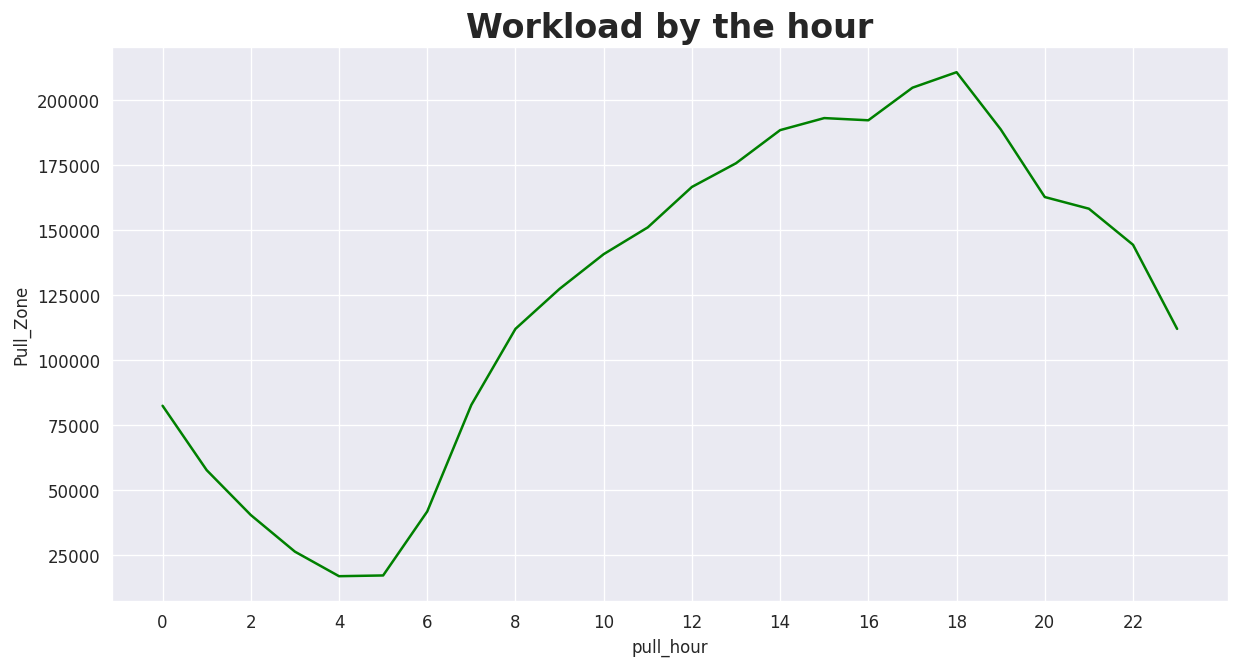

In [88]:
plt.figure(figsize = (12,6),dpi = 120)
plt.title("Workload by the hour",size = 20,weight = 'heavy')
plt.xticks(np.arange(0,24,2))
sns.lineplot(data = data, x = 'pull_hour',y = 'Pull_Zone',color = 'green' )

In [89]:
new_df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Pull_Zone,pull_hour
0,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,141,Cash,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,Midtown Center,0
1,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,237,Credit card,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,Central Park,0
2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,238,Credit card,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,Clinton East,0
3,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,7,Credit card,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,LaGuardia Airport,0
4,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,79,Credit card,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,Gramercy,0


#### What is the favourite payment type?

In [ ]:
df.payment_type.value_counts()

Credit card    66548
Cash           33203
No charge        173
Dispute           76
Name: payment_type, dtype: int64

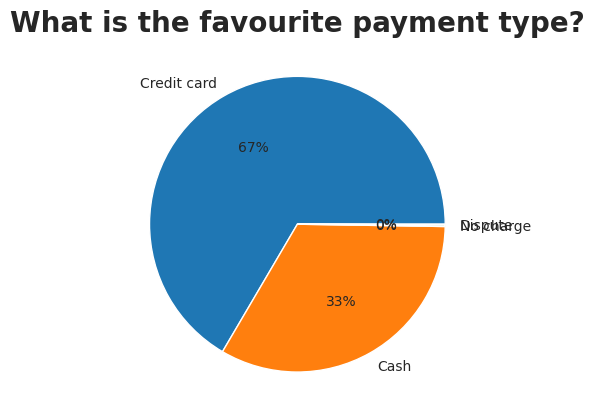

In [ ]:
plt.title("What is the favourite payment type?",size = 20, weight = 'heavy')
plt.pie(df.payment_type.value_counts(), labels = ["Credit card","Cash",
    "No charge",
    "Dispute"],autopct='%.0f%%')
plt.show()

We see that this column is unbalanced, there are a lot of people who pay by card and few who pay in cash

#### Fare analysis

In [65]:
data = new_df.groupby(by = 'payment_type', as_index = False)['fare_amount'].mean()
data

,payment_type,fare_amount
0,Cash,18.082795
1,Credit card,18.660045
2,Dispute,1.954440
3,No charge,8.113290


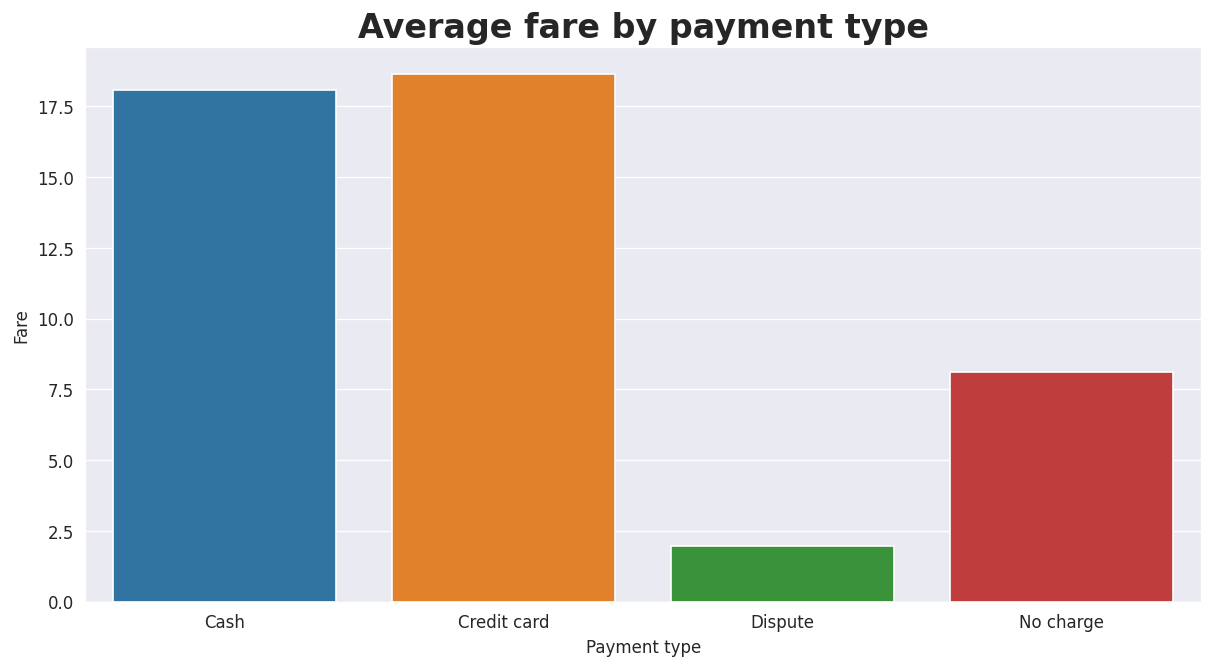

In [66]:
plt.figure(figsize = (12,6), dpi = 120)
plt.title("Average fare by payment type", size = 20, weight = 'heavy')
ax = sns.barplot(data = data, x = 'payment_type', y = 'fare_amount')
plt.ylabel('Fare')
plt.xlabel("Payment type")
plt.show()


#### Let's look at the dependence of the trip time on the price

In [90]:
new_df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Pull_Zone,pull_hour
0,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,141,Cash,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,Midtown Center,0
1,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,237,Credit card,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,Central Park,0
2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,238,Credit card,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,Clinton East,0
3,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,7,Credit card,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,LaGuardia Airport,0
4,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,79,Credit card,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,Gramercy,0


In [91]:
data = new_df.groupby(by = 'pull_hour',as_index = False)['fare_amount'].mean() \
      .sort_values(by = 'pull_hour',ascending = True)

data

,pull_hour,fare_amount
0,0,19.524389
1,1,17.571934
2,2,16.468268
3,3,17.388892
4,4,21.690426
5,5,26.032942
6,6,21.874735
7,7,18.747622
8,8,17.266825
9,9,17.406531


<Axes: title={'center': 'The average fare amount by the hour'}, xlabel='pull_hour', ylabel='fare_amount'>

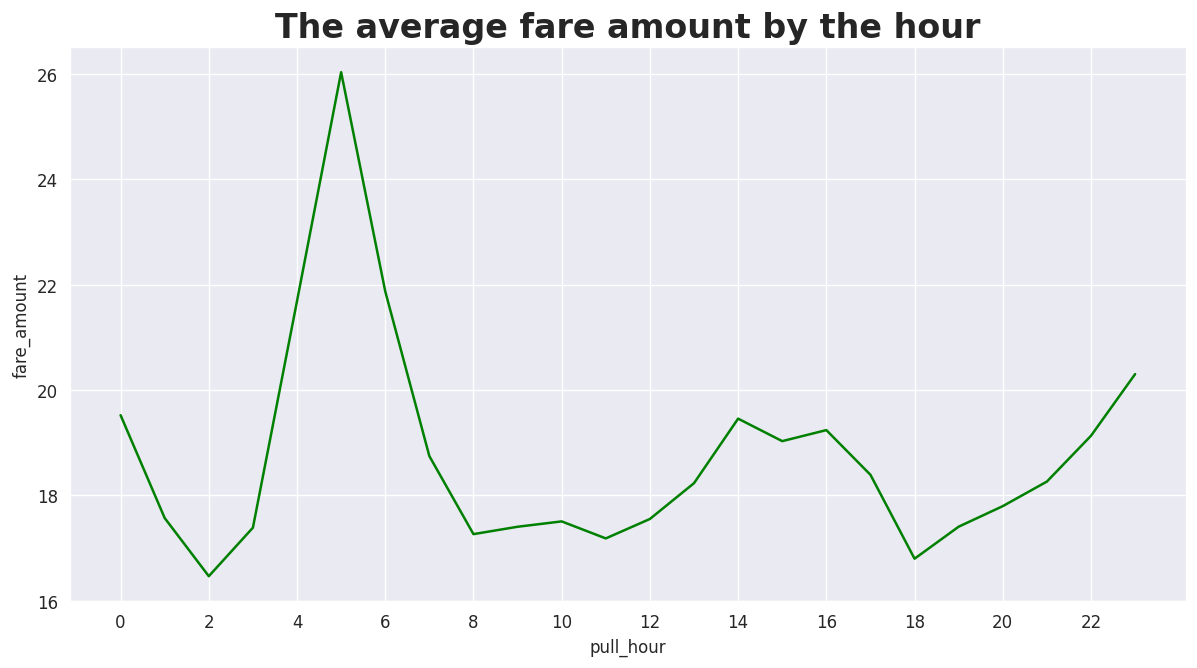

In [93]:
plt.figure(figsize = (12,6),dpi = 120)
plt.title("The average fare amount by the hour",size = 20,weight = 'heavy')
plt.xticks(np.arange(0,24,2))
sns.lineplot(data = data, x ='pull_hour', y = 'fare_amount',color = 'green')

We see that at the fifth hour of the morning the highest fare amount

**The most profitable places by the average check**

In [95]:
data = new_df.groupby(by = 'Pull_Zone',as_index = False)['fare_amount'].mean() \
      .sort_values(by = 'fare_amount',ascending = False).head(5)
data

,Pull_Zone,fare_amount
163,Newark Airport,87.988020
98,Great Kills,79.800000
2,Arden Heights,64.378571
103,Grymes Hill/Clifton,63.975000
7,Baisley Park,62.298551


<Axes: title={'center': 'The most profitable places by the average check'}, xlabel='Pull_Zone', ylabel='fare_amount'>

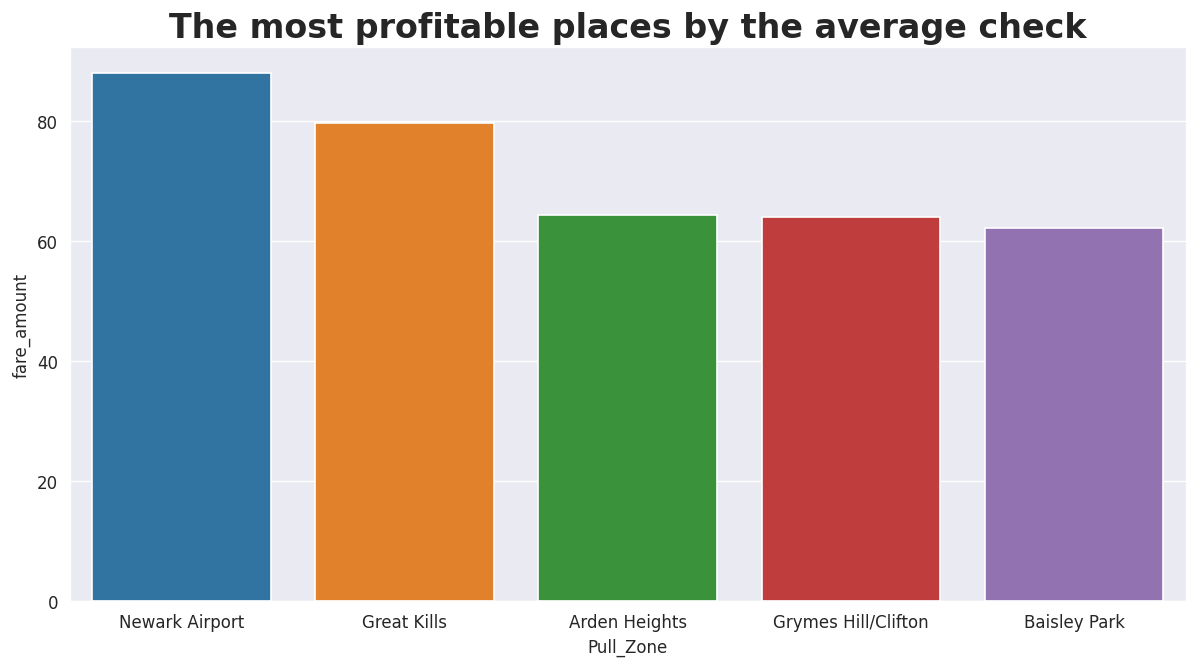

In [96]:
plt.figure(figsize = (12,6),dpi = 120)
plt.title("The most profitable places by the average check",size = 20,weight = 'heavy')
sns.barplot(data = data, x = 'Pull_Zone', y = 'fare_amount')

It can be concluded that on average, a trip where there is a card payment is more expensive than where cash is

<Axes: >

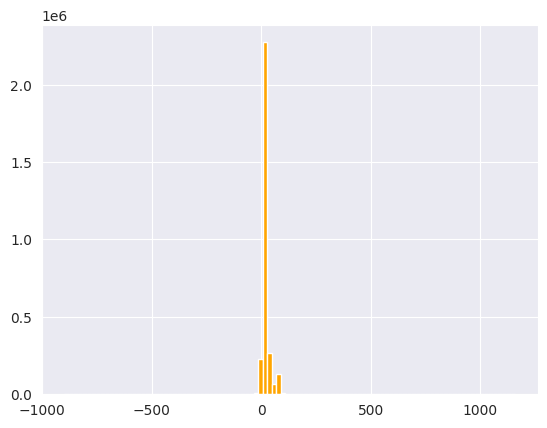

In [68]:
new_df.fare_amount.hist(bins = 100, color = 'orange')

The graph shows the distribution of the price for the trip

In [97]:
print("The mean value:",new_df.fare_amount.mean())

The mean value: 18.308272437306822


#### Tip analysis

<Axes: >

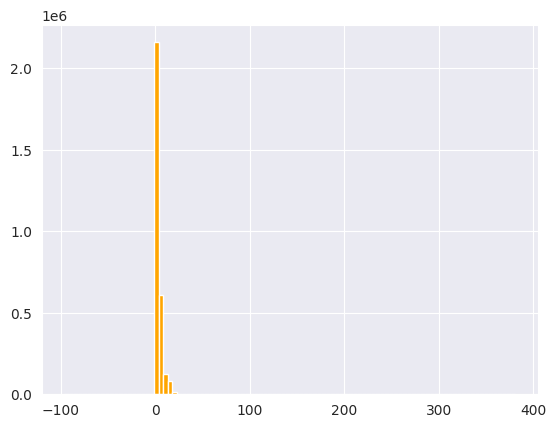

In [98]:
new_df.tip_amount.hist(color = 'orange',bins = 100)

In [99]:
print("The mean value:",new_df.tip_amount.mean())

The mean value: 3.3591933985148033


In [100]:
data = new_df.groupby(by = 'payment_type', as_index = False)['tip_amount'].mean()
data

,payment_type,tip_amount
0,Cash,0.001675
1,Credit card,4.170799
2,Dispute,0.051490
3,No charge,0.029469


In [101]:
new_df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Pull_Zone,pull_hour
0,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,141,Cash,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,Midtown Center,0
1,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,237,Credit card,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,Central Park,0
2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,238,Credit card,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,Clinton East,0
3,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,7,Credit card,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,LaGuardia Airport,0
4,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,79,Credit card,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,Gramercy,0


#### Does the amount of tips depend on the place of boarding the taxi? Let's find out

In [105]:
data = new_df.groupby(by = 'Pull_Zone',as_index = False)['tip_amount'].mean() \
      .sort_values(by = 'tip_amount',ascending = False) \
      .head(10)
data 

,Pull_Zone,tip_amount
99,Green-Wood Cemetery,15.035000
163,Newark Airport,12.425990
235,West Brighton,10.000000
7,Baisley Park,9.771114
85,Flushing Meadows-Corona Park,9.652091
184,Randalls Island,9.338974
5,Astoria Park,8.465455
117,JFK Airport,8.281512
205,South Jamaica,8.220563
127,LaGuardia Airport,8.215715


<Axes: title={'center': 'Places with the biggest tips'}, xlabel='tip_amount', ylabel='Pull_Zone'>

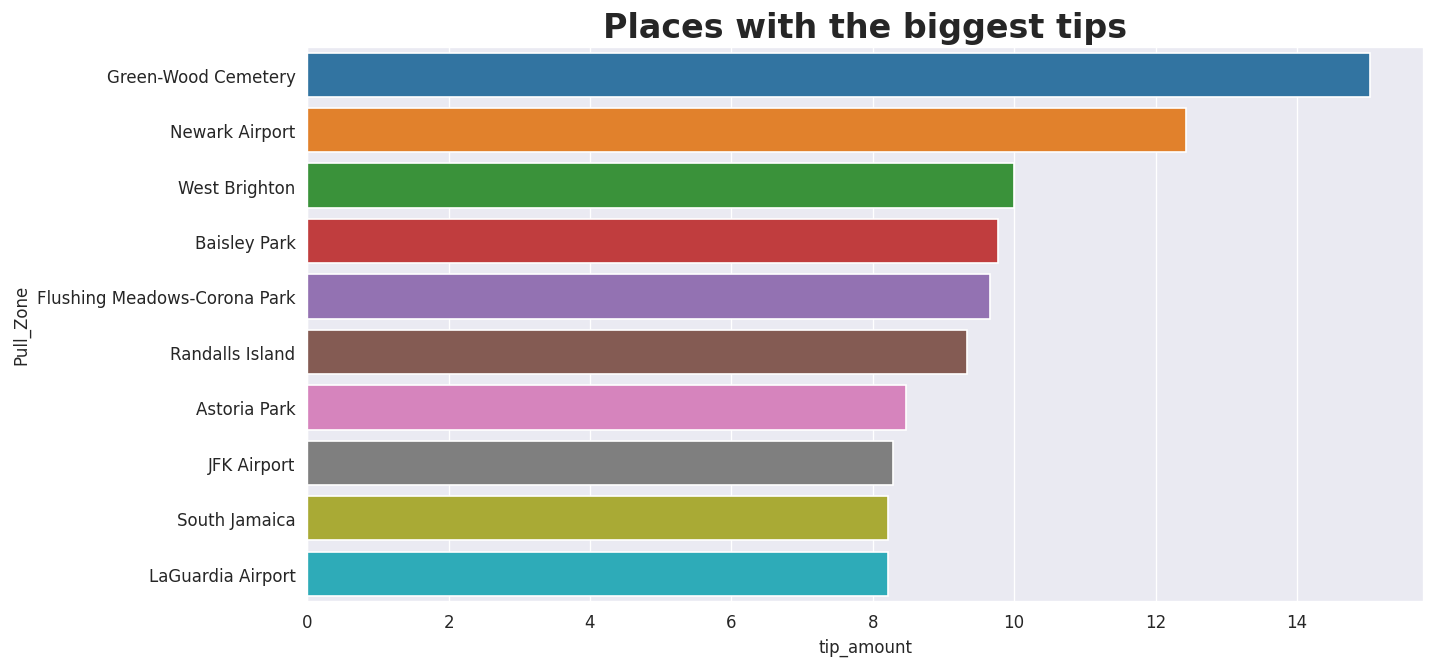

In [107]:
plt.figure(figsize = (12,6),dpi = 120)
plt.title('Places with the biggest tips',weight ='heavy',size = 20)
sns.barplot(data = data, x = 'tip_amount', y ='Pull_Zone')

#### Total amount analysis

<Axes: >

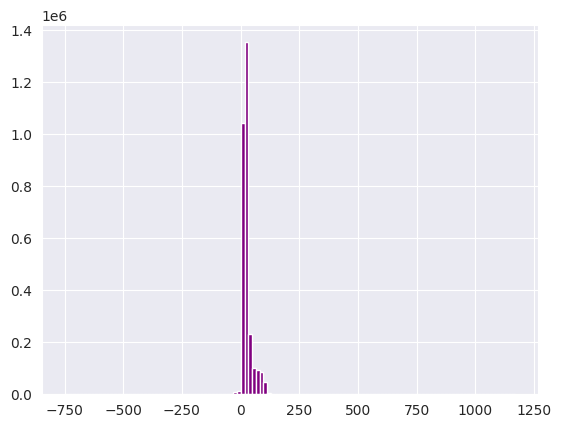

In [108]:
new_df.total_amount.hist(bins = 120, color = 'purple')

In [109]:
print("The mean value:",new_df.total_amount.mean())
print("The maximum value:",new_df.total_amount.max())
print("The lowest value:",new_df.total_amount.min())

The mean value: 26.969763197144072
The maximum value: 1169.4
The lowest value: -751.0


It can be noted that we have an outlier here in the form of -751 of the final price, let's look at it in more detail

In [120]:
new_df[new_df['total_amount'] == -751.0]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Pull_Zone,pull_hour
2849551,2023-01-30 13:23:56,2023-01-30 13:24:08,1.0,182,No charge,-750.0,0.0,0.0,0.0,0.0,-1.0,-751.0,0.0,0.0,Parkchester,13


In [116]:
data = new_df.groupby(by = 'pull_hour',as_index = False)['total_amount'].mean().sort_values(by = 'pull_hour',ascending = True)
data

,pull_hour,total_amount
0,0,28.407685
1,1,25.893867
2,2,24.381132
3,3,25.425122
4,4,30.556217
5,5,35.880097
6,6,30.121754
7,7,26.535136
8,8,24.863213
9,9,25.198200


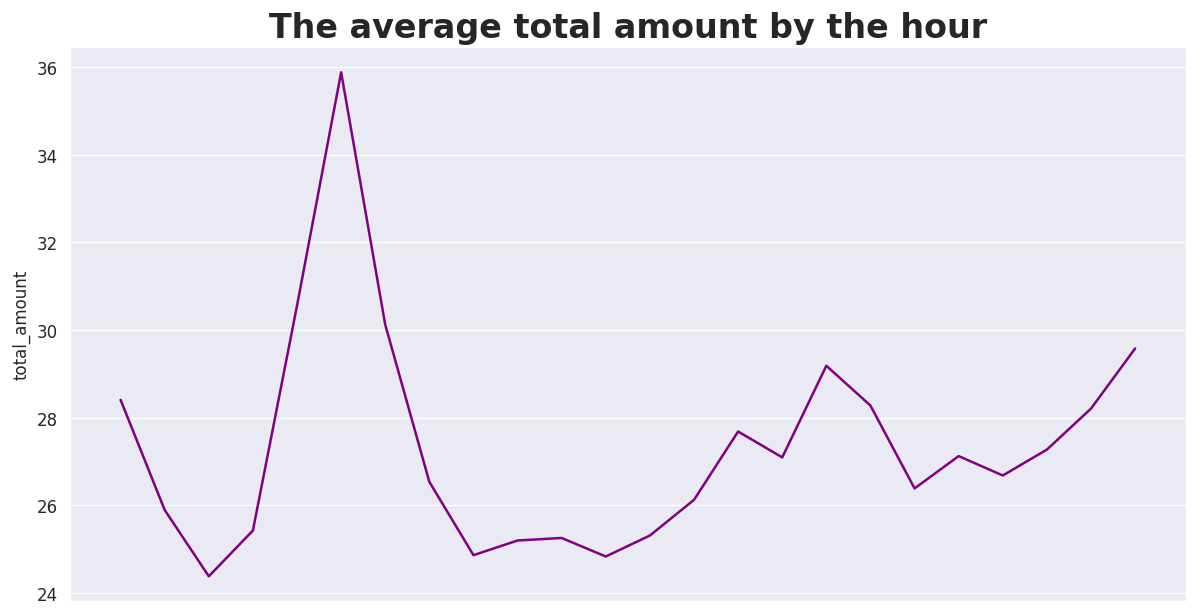

In [118]:
plt.figure(figsize = (12,6), dpi = 120)
plt.title("The average total amount by the hour", size = 20, weight = 'heavy')
plt.xticks([])
sns.lineplot(data = data, x = 'pull_hour', y = 'total_amount', color = 'purple')
plt.show()

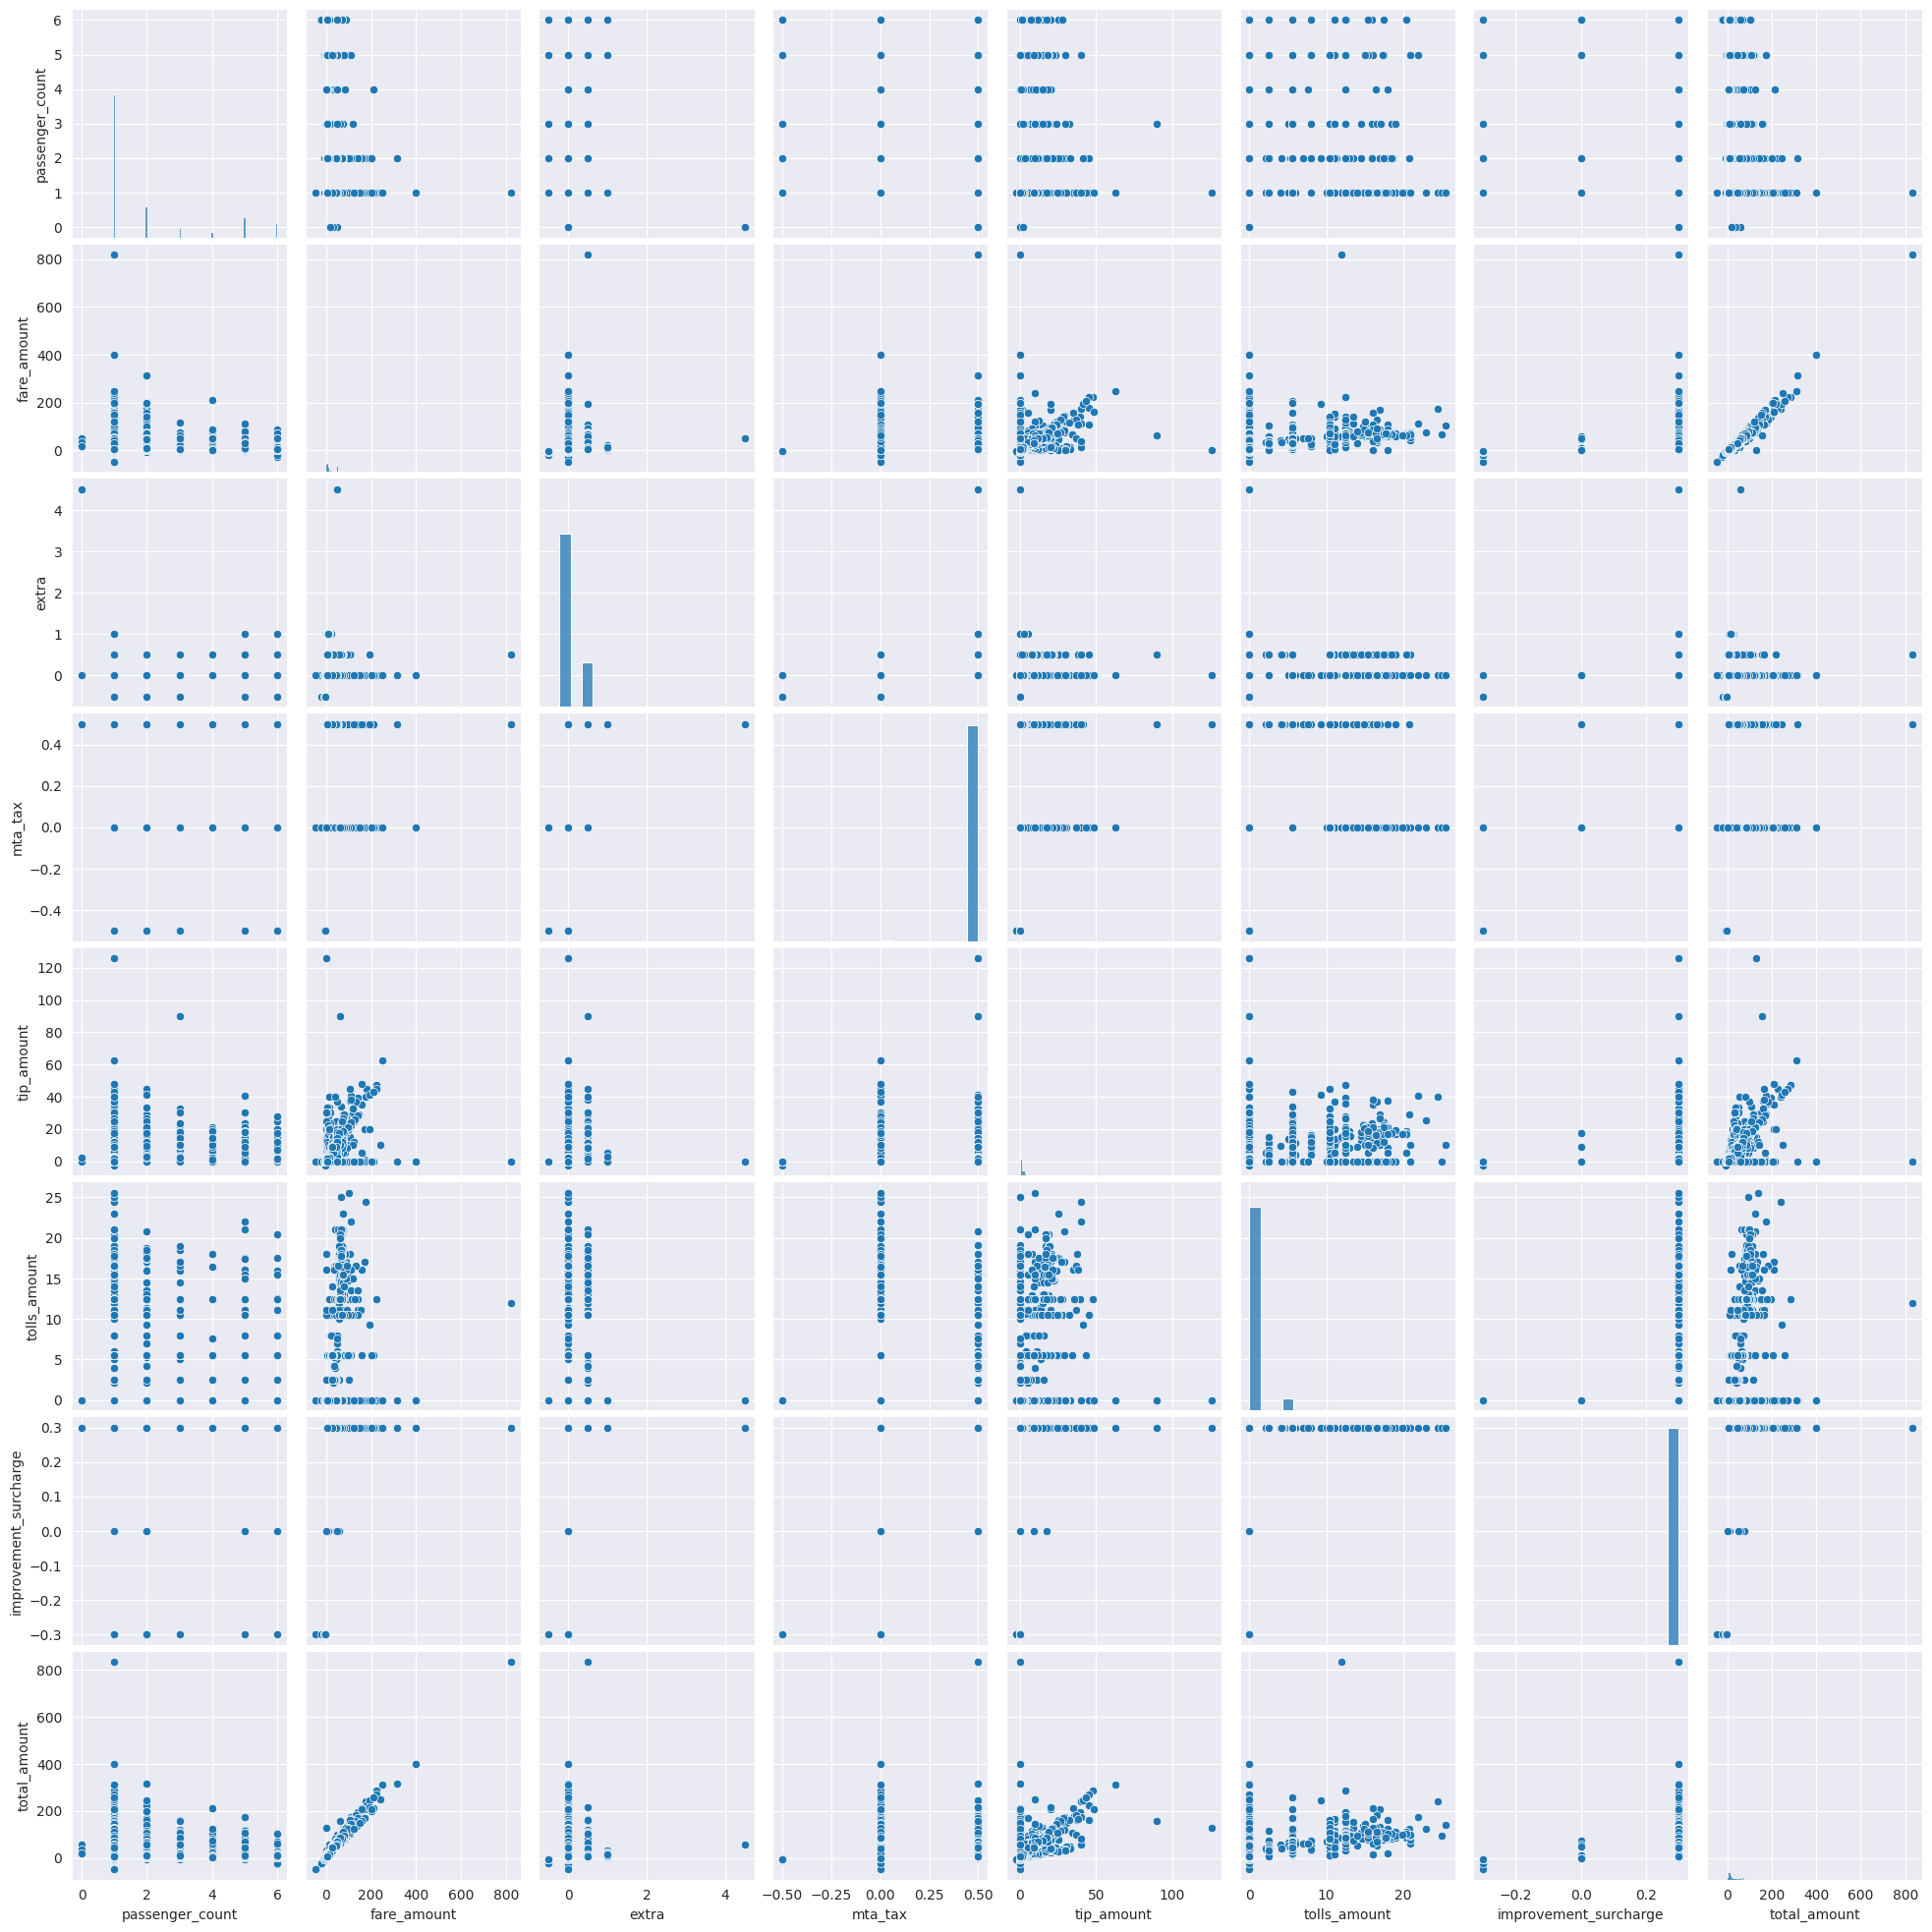

In [ ]:
sns.pairplot(data = df)

<ipython-input-70-2d3646dd07cf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


<Axes: >

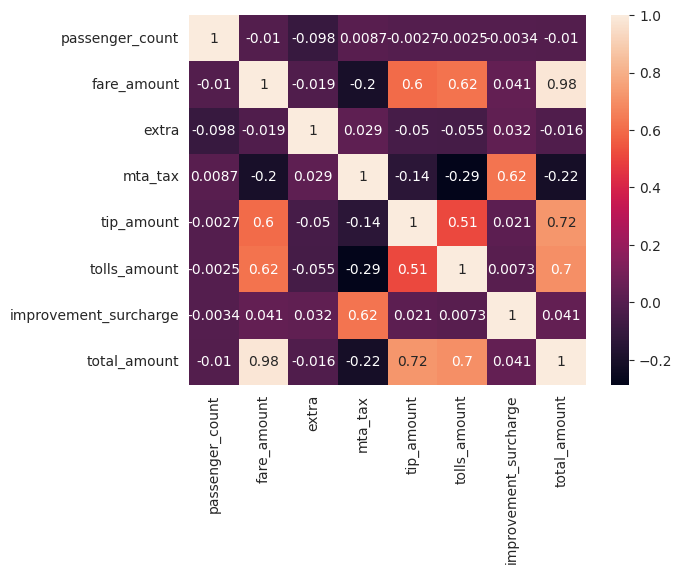

In [ ]:
sns.heatmap(df.corr(),annot = True)